In [49]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [50]:
#read the CSV file into a dataframe
df= pd.read_csv('pG_picked_protein_group_no_remap_750.csv')

#select columns that you want to keep 
columns_to_keep=['Protein IDs', 'Q-value', 'Score']
new_df= df[columns_to_keep]
print(new_df)

#print(new_df) 
new_df.to_csv('ProteinIDs_picked_protein_group_no_remap_750_withScore.csv', index=False)

                                             Protein IDs   Q-value     Score
0      sp|P55060|XPO2_HUMAN;sp|P55060-3|XPO2_HUMAN;sp...  0.000237  4.000000
1            sp|P30405|PPIF_HUMAN;sp|P30405-2|PPIF_HUMAN  0.000237  4.000000
2                                  sp|Q15365|PCBP1_HUMAN  0.000237  4.000000
3                                  sp|Q14204|DYHC1_HUMAN  0.000237  4.000000
4                                  sp|P38646|GRP75_HUMAN  0.000237  4.000000
...                                                  ...       ...       ...
39244                          pI|c14riboseqorf107_HUMAN  0.603571  0.303692
39245                       REV__sp|Q8WXH0-7|SYNE2_HUMAN  0.603608  0.303155
39246                       REV__sp|Q9NSC5-2|HOME3_HUMAN  0.603623  0.302696
39247                             REV__sR|single_ribo101  0.603637  0.302245
39248                            pI|c2riboseqorf50_HUMAN  0.603637  0.302060

[39249 rows x 3 columns]


In [51]:
df = pd.read_csv('ProteinIDs_picked_protein_group_no_remap_750_withScore.csv')

# Split the column by '|', but only keep the first two splits if there are more than 2
split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

# Rename the new columns
split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

# Concatenate the original DataFrame and the new columns
new_df = pd.concat([df['Q-value'], split_col], axis=1)
print(new_df)
new_df.to_csv('SeparateProteinIDs_picked_protein_group_no_remap_750_withScore.csv')

        Q-value Protein Type         Protein Uniprot  \
0      0.000237           sp                  P55060   
1      0.000237           sp                  P30405   
2      0.000237           sp                  Q15365   
3      0.000237           sp                  Q14204   
4      0.000237           sp                  P38646   
...         ...          ...                     ...   
39244  0.603571           pI  c14riboseqorf107_HUMAN   
39245  0.603608      REV__sp                Q8WXH0-7   
39246  0.603623      REV__sp                Q9NSC5-2   
39247  0.603637      REV__sR          single_ribo101   
39248  0.603637           pI    c2riboseqorf50_HUMAN   

                                           Protein Label  
0      XPO2_HUMAN;sp|P55060-3|XPO2_HUMAN;sp|P55060-4|...  
1                      PPIF_HUMAN;sp|P30405-2|PPIF_HUMAN  
2                                            PCBP1_HUMAN  
3                                            DYHC1_HUMAN  
4                               

sp         17865
REV__sp    10957
REV__sR     2728
sR          2690
pI          2036
REV__pI     2033
sU           326
REV__sU      289
nC           166
REV__nC      159
Name: Protein Type, dtype: int64


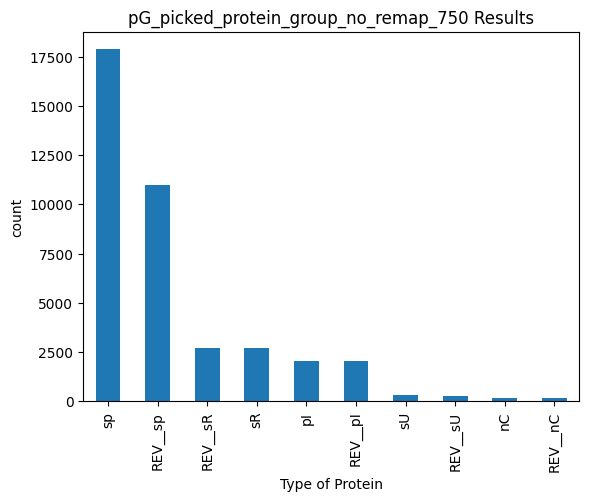

In [52]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('SeparateProteinIDs_picked_protein_group_no_remap_750_withScore.csv')

# Count the number of occurrences of each unique string in the 'Column 1' column
value_counts = df['Protein Type'].value_counts()

# Print the value counts
print(value_counts)

# Plot the value counts as a bar chart
value_counts.plot(kind='bar')
plt.title('pG_picked_protein_group_no_remap_750 Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
plt.show()

Protein Type
REV__pI        1
REV__sR        4
REV__sp      111
nC             1
pI             4
sR             4
sp         11577
Name: Protein Type, dtype: int64


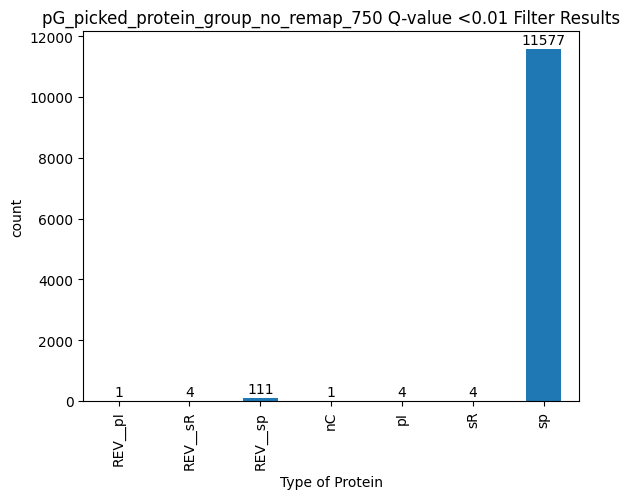

In [53]:
df = pd.read_csv('SeparateProteinIDs_picked_protein_group_no_remap_750_withScore.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

# group by protein type and count the number of each type
protein_count = df_filtered.groupby('Protein Type')['Protein Type'].count()

# print the protein count
print(protein_count)

# Plot the value counts as a bar chart
protein_count.plot(kind='bar')
plt.title('pG_picked_protein_group_no_remap_750 Q-value <0.01 Filter Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()
          

In [54]:
# filter for Q-value >= 0.01
df_above_cutoff = df[df['Q-value'] >= 0.01]

# group by protein type and count the number of each type above the Q-value cutoff
protein_count_above = df_above_cutoff.groupby('Protein Type')['Protein Type'].count()

# print the protein counts
print("Protein count below Q-value cutoff:")
print(protein_count)
print("\nProtein count above Q-value cutoff:")
print(protein_count_above)

Protein count below Q-value cutoff:
Protein Type
REV__pI        1
REV__sR        4
REV__sp      111
nC             1
pI             4
sR             4
sp         11577
Name: Protein Type, dtype: int64

Protein count above Q-value cutoff:
Protein Type
REV__nC      159
REV__pI     2032
REV__sR     2724
REV__sU      289
REV__sp    10846
nC           165
pI          2032
sR          2686
sU           326
sp          6288
Name: Protein Type, dtype: int64


# Q-value filter CUTOFF <0.01

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_60709/837104531.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_60709/837104531.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')


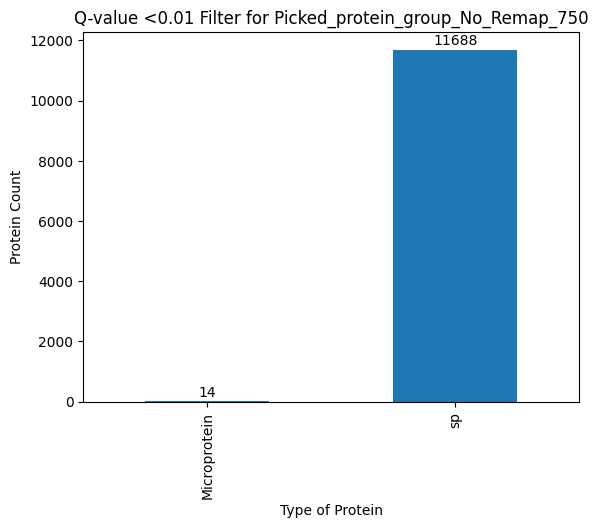

In [55]:

# filter for Q-value < 0.01
df_below_cutoff = df[df['Q-value'] < 0.01]

# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')

# combine counts for sp and REV__sp as 'sp'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type below the Q-value cutoff
protein_count_below = df_below_cutoff.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count_below.plot(kind='bar')
plt.title('Q-value <0.01 Filter for Picked_protein_group_No_Remap_750')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')
# add labels to the bars
for i, count in enumerate(protein_count_below):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

# No Q-value filter

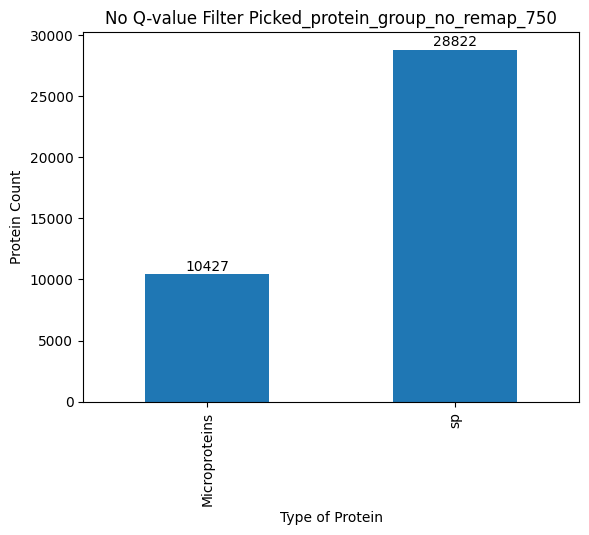

In [56]:
# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df['Protein Type'] = df['Protein Type'].replace(['REV__pI', 'REV__sR', 'REV__nC', 'REV__sU', 'pI', 'sR', 'nC', 'sU'], 'Microproteins')

# combine counts for sp and REV__sp as 'sp'
df['Protein Type'] = df['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type
protein_count = df.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count.plot(kind='bar')
plt.title('No Q-value Filter Picked_protein_group_no_remap_750')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')

# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()